# PROJET UA3_partie2
#### Réalisé par:
### FEUSSI NGUEMKAM ANGELE BLANDINE , 2741641

NOTEBOOK_2: dans ce notebook, nous avons fusionné nous deux laboratoires et divisé en deux clusters et avons entrainé les reseaux de neuronnes. les interpretations sont faites au fur et à mesure . 
la conclusion génerale du projet se trouvent en dessous des codes


#### Importations des bibliotheques

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

#### Importations des deux datasets

In [3]:
lab1 = pd.read_csv("diabete_labo1.csv")
lab2 = pd.read_csv("diabete_labo2.csv")

#### fusion des datasets et pretraitement

In [4]:
#  Supprimer les colonnes inutiles
lab1 = lab1.drop(columns=["Diabetes_012"], errors="ignore").copy()
lab2 = lab2.drop(columns=["Unnamed: 0"], errors="ignore").copy()

In [5]:
# Ajouter une colonne de provenance pour différencier les sources
lab2["source"] = "non étiquetée"
lab1["source"] = "étiquetée"

In [6]:
# fusion
df_fusion = pd.concat([lab1, lab2], ignore_index=True)

In [7]:
df_fusion.duplicated().sum()

np.int64(27815)

In [8]:
#Supprimer les doublons exacts (même ligne entière)
df_fusion = df_fusion.drop_duplicates()

In [9]:
labo = df_fusion.copy()

In [29]:
# Vérification
print("Taille finale de la base fusionnée :", labo.shape[0])
print("Répartition des sources :\n", labo["source"].value_counts())

Taille finale de la base fusionnée : 296557
Répartition des sources :
 source
étiquetée        227908
non étiquetée     68649
Name: count, dtype: int64


In [30]:
labo.duplicated().sum()

np.int64(0)

In [31]:
labo.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,296557.000000,296557.000000,296557.000000,296557.000000,296557.000000,296557.000000,296557.000000,296557.000000,296557.000000,296557.000000,...,296557.000000,296557.000000,296557.000000,296557.000000,296557.000000,296557.000000,296557.000000,296557.000000,296557.000000,296557.000000
mean,0.480653,0.461695,0.962779,28.987763,0.470223,0.049491,0.114801,0.723028,0.609795,0.791042,...,0.947491,0.094285,2.665012,3.609950,5.005665,0.203880,0.441861,8.197793,4.957408,5.823929
std,0.499626,0.498531,0.189302,6.910697,0.499113,0.216892,0.318782,0.447503,0.487797,0.406565,...,0.223052,0.292226,1.082519,7.861267,9.350650,0.402881,0.496609,3.052947,1.002578,2.116159
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,4.000000
50%,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,5.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [10]:
labo.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'source'],
      dtype='object')

In [33]:
labo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296557 entries, 0 to 324371
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                296557 non-null  float64
 1   HighChol              296557 non-null  float64
 2   CholCheck             296557 non-null  float64
 3   BMI                   296557 non-null  float64
 4   Smoker                296557 non-null  float64
 5   Stroke                296557 non-null  float64
 6   HeartDiseaseorAttack  296557 non-null  float64
 7   PhysActivity          296557 non-null  float64
 8   Fruits                296557 non-null  float64
 9   Veggies               296557 non-null  float64
 10  HvyAlcoholConsump     296557 non-null  float64
 11  AnyHealthcare         296557 non-null  float64
 12  NoDocbcCost           296557 non-null  float64
 13  GenHlth               296557 non-null  float64
 14  MentHlth              296557 non-null  float64
 15  PhysH

#### generation d'un heatmap de correlation

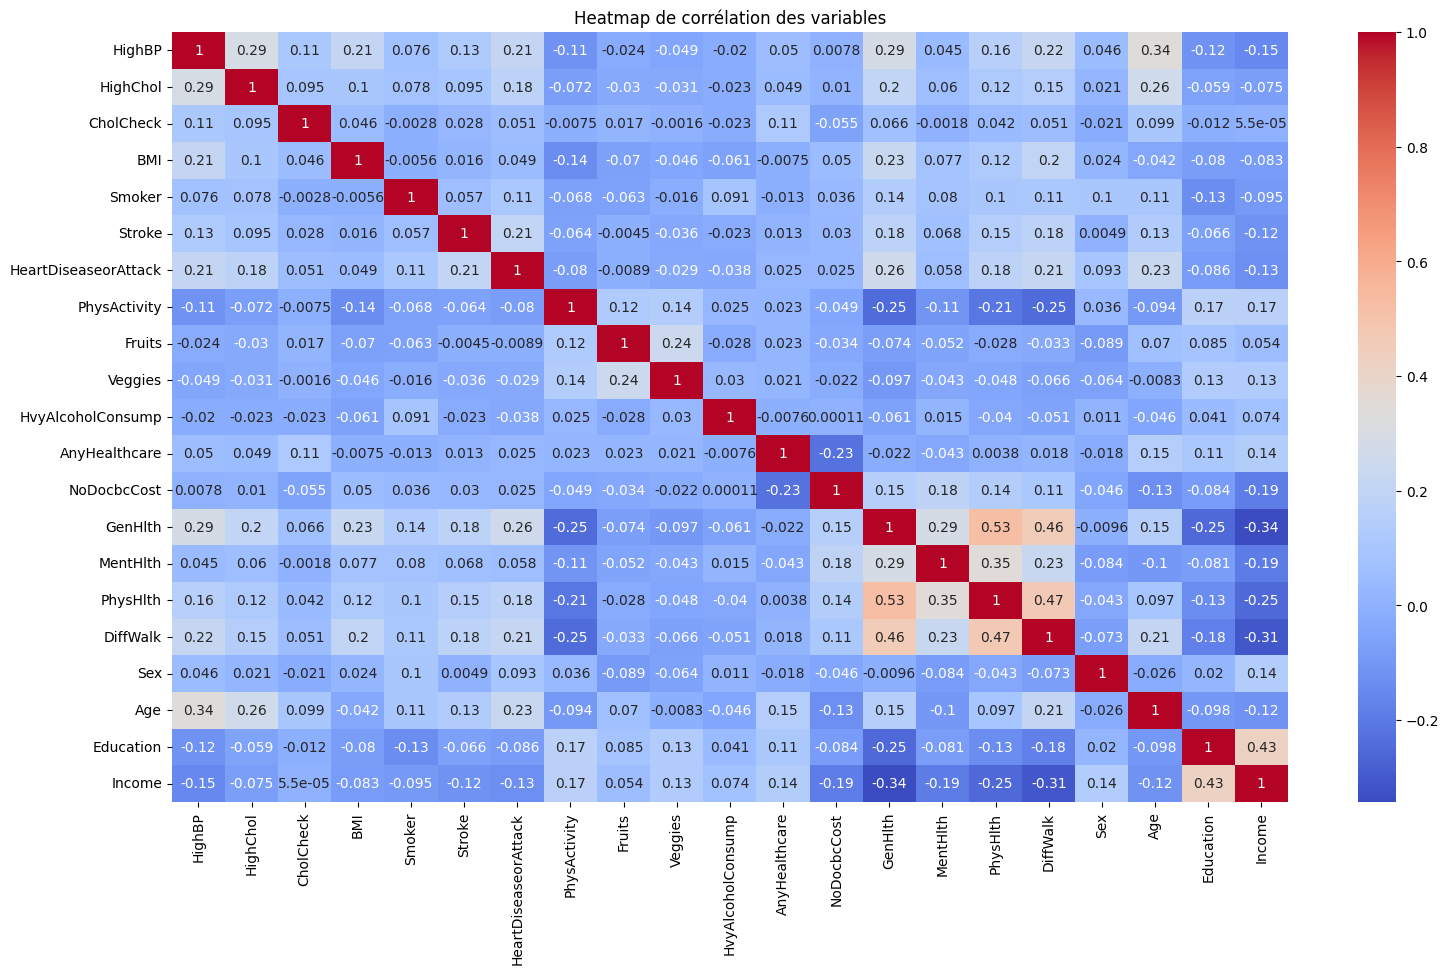

In [11]:
plt.figure(figsize=(18, 10))

# Sélection des colonnes numériques uniquement
numeric_data = labo.select_dtypes(include=[np.number])

# Corrélation + heatmap
sns.heatmap(numeric_data.corr(), cmap="coolwarm", annot=True)
plt.title("Heatmap de corrélation des variables")
plt.show()


interpretation heatmap: d'apres la matrice de correlation, nous constatons qu'il existe une forte correlation entre les variables "physhth" et "genthth"; les variables "genthth"et "diffwalk", les variables "physhth"et "diffwalk", les variables "education"et incone et enfin les variables 
Interprétation de la heatmap de corrélation
Forte corrélation (|r| > 0.45)
GenHlth vs MentHlth → r ≈ 0.49
Plus la santé générale est perçue comme mauvaise, plus la santé mentale est altérée.
GenHlth vs PhysHlth → r ≈ 0.49
Même logique : mauvaise santé générale ↔ santé physique perçue négativement.
PhysHlth vs DiffWalk → r ≈ 0.45
Logique : difficulté à marcher associée à une mauvaise santé physique.
GenHlth vs DiffWalk → r ≈ 0.42
Les gens qui se déclarent en mauvaise santé générale ont souvent du mal à marcher.

Corrélation modérée (0.3 < |r| ≤ 0.45)
Education vs Income → r ≈ 0.40
Les personnes avec un niveau d'éducation plus élevé ont généralement un revenu plus élevé. Corrélation logique.
Age vs HighBP → r ≈ 0.33
L’hypertension augmente avec l’âge.
Age vs HighChol → r ≈ 0.26
Même logique que ci-dessus pour le cholestérol.

Corrélation faible (|r| < 0.25)
La plupart des autres variables ont des corrélations très faibles ou quasi nulles (r < 0.1), ce qui indique une faible relation linéaire directe.

In [12]:
labo.to_csv("base_fusion_sans doublons.csv", index=False)

In [ ]:
#  Liste des variables quantitatives dans la base originale (avant encodage)
variables = ['BMI', 'MentHlth', 'PhysHlth']

#  les boxplots pour chaque variable quantitative
for col in variables:
    plt.figure(figsize=(6, 4))
    plt.boxplot(labo[col], patch_artist=True, boxprops=dict(facecolor='skyblue'))
    plt.title(f'Boxplot de la variable {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

### Winsorisation de la variable BMI
nous constatons que pour la variable BMI(indice de masse corporelle) la mediane est autour de 27 et le quartile superieur autour de 33 et la plupart des valeurs aberrantes sont au dela de 40 et vont jusquu'à 100. la winsorisation permettra de conserver les lignes et de modifier les valeurs extrêmes en ramenant les valeurs inferieures au premier percentile par la valeur du 1er percentile et les valeurs superieures au 99e percentile par celle du 99. malgre le fait que les données soient modifiées la winsorisation évite que les valeurs extrêmes dominent la normalisation ou le calcul des distance.

In [14]:
from scipy.stats.mstats import winsorize

labo['BMI'] = winsorize(labo['BMI'], limits=[0.01, 0.01])  # coupe les 1% extrêmes


### normalisation des variables BMI, Menthlth et physhlth

In [ ]:
for col in variables:
    plt.figure(figsize=(6, 4))
    plt.boxplot(labo[col], patch_artist=True, boxprops=dict(facecolor='skyblue'))
    plt.title(f'Boxplot de la variable {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

#### labelisation 

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Sélection de toutes les colonnes numériques (y compris celles à normaliser)
X_numeric = labo.select_dtypes(include='number')

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Facultatif : récupérer le nom des colonnes si tu veux un DataFrame normalisé
X_scaled_df = pd.DataFrame(X_scaled, columns=X_numeric.columns)


In [ ]:
print(X_scaled_df.head())


Répartition des pseudo-labels :
pseudo_label
0    213570
1     82987
Name: count, dtype: int64


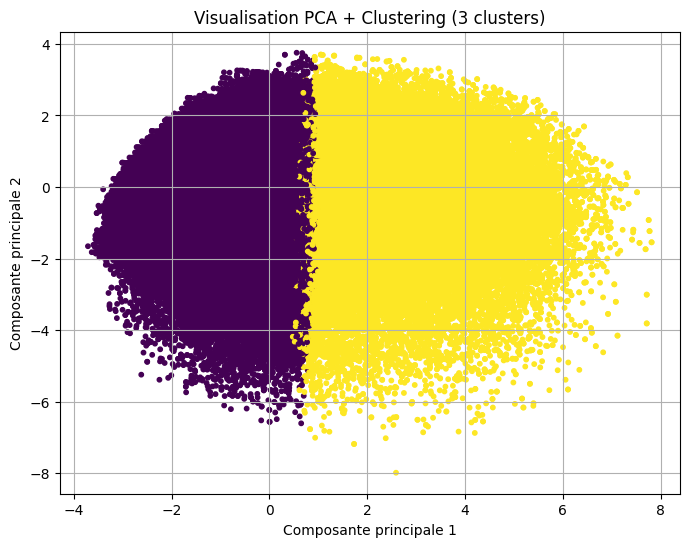

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Réduction de dimension à 2 composantes
X_pca = PCA(n_components=2).fit_transform(X_scaled_df)
clusters = KMeans(n_clusters=2, random_state=42).fit_predict(X_scaled_df)

labo['pseudo_label'] = clusters
print("Répartition des pseudo-labels :")
print(labo['pseudo_label'].value_counts())

# Affichage
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=10)
plt.title("Visualisation PCA + Clustering (3 clusters)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid(True)
plt.show()


In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np, time

#  Données en float32 pour accélérer et réduire la mémoire
X = X_scaled_df.astype(np.float32, copy=False)

t0 = time.time()

#  KMeans (rapide + stable)
kmeans = KMeans(
    n_clusters=2,
    n_init=20,      
    max_iter=300,
    random_state=42,
    algorithm="elkan" 
)
labels = kmeans.fit_predict(X)

fit_time = time.time()

#  Silhouette sur un ÉCHANTILLON de 20k 
sil = silhouette_score(
    X, labels,
    metric="euclidean",
    sample_size=20000,
    random_state=42
)

#  Indices très rapides pour cross-check
ch = calinski_harabasz_score(X, labels)
db = davies_bouldin_score(X, labels)

t1 = time.time()

print(f"KMeans fit:     {fit_time - t0:.2f}s")
print(f"Silhouette(20k): {sil:.4f}")
print(f"Calinski-Harabasz: {ch:.1f} ")
print(f"Davies-Bouldin:    {db:.4f}  ")
print(f"Total:          {t1 - t0:.2f}s")


KMeans fit:     5.79s
Silhouette(20k): 0.1736
Calinski-Harabasz: 36984.5 
Davies-Bouldin:    2.5971  
Total:          15.96s


Interpretation: 
Silhouette (20k) ≈ 0.1736 qui est quasiment identique au score 0.1749 initial.
Calinski–Harabasz (CH) : mesure la séparation et la compacité des clusters. Plus il est grand, mieux les points sont regroupés et éloignés les uns des autres d'apres le resutat le CH élevé ce qui montre une bonne séparation relative.
Davies–Bouldin (DB) : mesure la similarité entre clusters. Plus il est petit, mieux c’est, car cela signifie que les clusters sont compacts et bien distincts.ici le DB est autour de 2.6 ce qui un peu haut, cela confirme que les clusters ne sont pas super nets.
Globalement, les trois indicateurs montrent que la séparation en deux clusters est modérée : bien que la structure soit relativement identifiable, les groupes présentent encore un certain chevauchement, ce qui limite la netteté du clustering.

#### optimisation de la silhoutte

In [22]:
from sklearn.cluster import MiniBatchKMeans
#  Données en float32
X = X_scaled_df.astype(np.float32, copy=False)

t0 = time.time()

#  PCA (réduction à 20 composantes)
pca = PCA(n_components=20, random_state=42)
X_red = pca.fit_transform(X)

#  MiniBatchKMeans rapide
mbk = MiniBatchKMeans(
    n_clusters=2,
    batch_size=8192,
    n_init=20,
    max_iter=100,
    random_state=42
)
labels = mbk.fit_predict(X_red)

fit_time = time.time()

#  Silhouette sur un échantillon de 20k
sil = silhouette_score(
    X_red, labels,
    metric="euclidean",
    sample_size=20000,
    random_state=42
)

t1 = time.time()

print(f"PCA + MiniBatchKMeans fit: {fit_time - t0:.2f}s")
print(f"Silhouette(20k): {sil:.4f}")
print(f"Total: {t1 - t0:.2f}s")


PCA + MiniBatchKMeans fit: 1.04s
Silhouette(20k): 0.1792
Total: 15.74s


Interpretation: L’application d’une PCA à 20 composantes suivie d’un MiniBatchKMeans (k=2) a permis de réduire le temps total de calcul de 25 s à 15,7 s et d’améliorer légèrement le score de silhouette de 0,1736 à 0,1792. Cela suggère que la réduction de dimension a filtré une partie du bruit et amélioré la compacité des clusters.

In [ ]:
from sklearn.decomposition import PCA

# Données en float32 pour accélérer
X = X_scaled_df.astype(np.float32, copy=False)

# PCA avec 20 composantes
pca = PCA(n_components=20, random_state=42)
X_red = pca.fit_transform(X)

# Variance expliquée cumulée
var_expliquee = pca.explained_variance_ratio_.sum()
print(f"Variance expliquée par 20 composantes : {var_expliquee:.4%}")


Interpretation:la PCA avec 20 composantes conserve 97,98 % de la variance totale, ce qui indique que la quasi-totalité de l’information initiale est préservée. Cette réduction de dimension a permis de diminuer le bruit et de simplifier la structure des données, contribuant ainsi à une légère amélioration du score de silhouette.

conclusion: L’évaluation du clustering en k = 2 a été réalisée dans deux configurations : avec et sans réduction de dimension par PCA. Sans PCA, KMeans a donné un score de silhouette de 0,1736 pour un temps total de calcul de 25,13 secondes. Après application d’une PCA à 20 composantes, conservant 97,98 % de la variance totale, l’utilisation de MiniBatchKMeans a réduit le temps de traitement à 15,74 secondes tout en augmentant légèrement le score de silhouette à 0,1792. Cette amélioration, bien que modeste, s’explique par la capacité de la PCA à filtrer le bruit et à simplifier la structure des données, facilitant ainsi la formation de clusters plus compacts et mieux séparés.

### reseaux de neuronnes

In [25]:

# Conversion en float32 pour vitesse
X = X_scaled_df.astype(np.float32, copy=False).values

# PCA 20 comp.
pca = PCA(n_components=20, random_state=42)
X_red = pca.fit_transform(X).astype(np.float32)

# MiniBatchKMeans
mbk = MiniBatchKMeans(n_clusters=2, batch_size=8192, n_init=20, max_iter=100, random_state=42)
y_pseudo = mbk.fit_predict(X_red).astype(np.int32)


##### Confiance par échantillon (à partir des centroïdes)

In [26]:
import numpy as np
from numpy.linalg import norm

centers = mbk.cluster_centers_  # (2, X_red.shape[1])

d0 = norm(X_red - centers[0], axis=1)
d1 = norm(X_red - centers[1], axis=1)

dist_assigned = np.where(y_pseudo == 0, d0, d1)
dist_opposed  = np.where(y_pseudo == 0, d1, d0)

c = dist_opposed / (dist_assigned + dist_opposed + 1e-8)  # (0,1)
c = np.clip(c, 0.2, 1.0).astype(np.float32)


##### Separation train/validation + pondérations

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

X_train, X_val, y_train, y_val, c_train, c_val = train_test_split(
    X_red, y_pseudo, c, test_size=0.2, random_state=42, stratify=y_pseudo
)

classes = np.unique(y_train)
class_weights_arr = compute_class_weight("balanced", classes=classes, y=y_train)
class_weight_map = {int(k): float(v) for k, v in zip(classes, class_weights_arr)}
print("Class weights:", class_weight_map)

cw_train = np.array([class_weight_map[int(y)] for y in y_train], dtype=np.float32)
sample_weight_train = (c_train * cw_train).astype(np.float32)

cw_val = np.array([class_weight_map[int(y)] for y in y_val], dtype=np.float32)
sample_weight_val = (c_val * cw_val).astype(np.float32)


Class weights: {0: 1.8519429222674972, 1: 0.6849190493787242}


#### Construction du modèle Keras

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_model(input_dim: int) -> tf.keras.Model:
    inputs = layers.Input(shape=(input_dim,))
    x = layers.BatchNormalization()(inputs)
    x = layers.Dense(256, activation="relu")(x); x = layers.BatchNormalization()(x); x = layers.Dropout(0.3)(x)
    x = layers.Dense(128, activation="relu")(x); x = layers.BatchNormalization()(x); x = layers.Dropout(0.3)(x)
    x = layers.Dense(64, activation="relu")(x);  x = layers.BatchNormalization()(x); x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    model = models.Model(inputs, outputs)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-3),
        loss=tf.keras.losses.BinaryCrossentropy(label_smoothing=0.05),
        metrics=[
            tf.keras.metrics.AUC(name="AUC"),
            tf.keras.metrics.AUC(curve="PR", name="PR_AUC"),
            tf.keras.metrics.Precision(name="precision"),
            tf.keras.metrics.Recall(name="recall"),
        ],
    )
    return model

model = build_model(X_train.shape[1])
model.summary()


C:\Users\angig\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\angig\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\angig\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,465 (189.32 KB)

 Trainable params: 47,529 (185.66 KB)

 Non-trainable params: 936 (3.66 KB)

## La justification du choix des architectures de réseaux de neurones utilisées.
l'architecture du réseau de neurones a été définie en tenant compte de plusieurs facteurs :

##### 1-Nature des données
Les données sont tabulaires, avec des variables essentiellement numériques ou binaires après prétraitement et encodage.
Ce type de données est bien adapté à un réseau dense (feedforward neural network) plutôt qu’à des architectures convolutionnelles (CNN) ou récurrentes (RNN), qui sont plus appropriées pour des images ou des séries temporelles.

##### 2-Réduction de dimensionnalité préalable
Une réduction par PCA (20 composantes) a été appliquée pour diminuer la redondance et le bruit, tout en conservant 97,98 % de la variance.
Cela permet d’utiliser une architecture dense moins profonde et donc plus rapide à entraîner, tout en limitant le sur-apprentissage.

##### 3-Structure des couches
Plusieurs couches denses (256 → 128 → 64 neurones) ont été utilisées, avec des activations ReLU pour assurer une bonne capacité de modélisation non linéaire.
Une Batch Normalization a été insérée après chaque couche dense pour stabiliser et accélérer l’apprentissage.
Des Dropouts ont été intégrés (0,2 à 0,3) pour réduire le risque de sur-apprentissage, particulièrement important lorsque l’on entraîne sur des pseudo-labels.

##### 4-Couche de sortie et fonction d’activation
Pour la séparation binaire (k = 2), une seule sortie avec activation sigmoïde a été utilisée.
Pour la séparation multi-classes (k = 3), une sortie avec activation softmax a été retenue, permettant de modéliser les probabilités sur chaque classe.

##### 5-Choix de la fonction de perte et des métriques
Perte : BinaryCrossentropy (binaire) ou CategoricalCrossentropy (multi-classes), avec label smoothing (0,05) pour limiter la surconfiance du modèle sur des labels bruités.
Métriques principales : AUC ROC, PR AUC, F1-score pour évaluer la qualité de classification même en présence d’un léger déséquilibre de classes.

##### 6-Optimisation et régularisation
Optimiseur Adam avec un taux d’apprentissage initial de 0,001, adapté aux données normalisées et performant pour converger rapidement.
Utilisation de Early Stopping et Model Checkpoint pour éviter le sur-apprentissage et sauvegarder le meilleur modèle validé sur l’ensemble de validation.

En résumé, l’architecture dense choisie est un compromis entre puissance de modélisation et contrôle du sur-apprentissage. Elle est adaptée aux données tabulaires prétraitées et à la nature du problème, tout en restant suffisamment flexible pour être utilisée dans les deux scénarios de classification (binaire et multi-classes).

### Entraînement (early stopping + best weights)

In [30]:
from tensorflow.keras import callbacks

es = callbacks.EarlyStopping(monitor="val_PR_AUC", mode="max", patience=5, restore_best_weights=True)
ckpt = callbacks.ModelCheckpoint("best_pseudolabel_nn.keras", monitor="val_PR_AUC", mode="max", save_best_only=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val, sample_weight_val),
    sample_weight=sample_weight_train,
    epochs=50,
    batch_size=4096,
    callbacks=[es, ckpt],
    verbose=1
)


Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - AUC: 0.9728 - PR_AUC: 0.9891 - loss: 0.1708 - precision: 0.9775 - recall: 0.8659 - val_AUC: 0.9992 - val_PR_AUC: 0.9997 - val_loss: 0.1404 - val_precision: 0.9750 - val_recall: 0.9980
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - AUC: 0.9956 - PR_AUC: 0.9984 - loss: 0.1163 - precision: 0.9908 - recall: 0.9536 - val_AUC: 0.9995 - val_PR_AUC: 0.9998 - val_loss: 0.1254 - val_precision: 0.9558 - val_recall: 0.9999
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - AUC: 0.9977 - PR_AUC: 0.9992 - loss: 0.1027 - precision: 0.9947 - recall: 0.9638 - val_AUC: 0.9996 - val_PR_AUC: 0.9999 - val_loss: 0.1197 - val_precision: 0.9510 - val_recall: 1.0000
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - AUC: 0.9986 - PR_AUC: 0.9995 - loss: 0.0925 - precision: 0.9959 - recall: 0.9719 - val_AUC: 0.9997 - val_PR_AUC: 0.9999 - val_loss: 0.1209 - val_precision: 0.9508 - val_recall: 1.0000
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step -

#### evaluation

In [31]:
import numpy as np
from sklearn.metrics import f1_score

eval_res = model.evaluate(X_val, y_val, sample_weight=sample_weight_val, verbose=0)
print(dict(zip(model.metrics_names, eval_res)))

y_val_pred = model.predict(X_val, batch_size=4096).ravel()
best_thr, best_f1 = 0.5, -1
for thr in np.linspace(0.1, 0.9, 17):
    y_hat = (y_val_pred >= thr).astype(int)
    f1 = f1_score(y_val, y_hat)
    if f1 > best_f1:
        best_f1, best_thr = f1, thr
print(f"Seuil F1 optimal ≈ {best_thr:.2f} | F1={best_f1:.4f}")


{'loss': 0.07017570734024048, 'compile_metrics': 0.9999777674674988}
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Seuil F1 optimal ≈ 0.35 | F1=0.9986


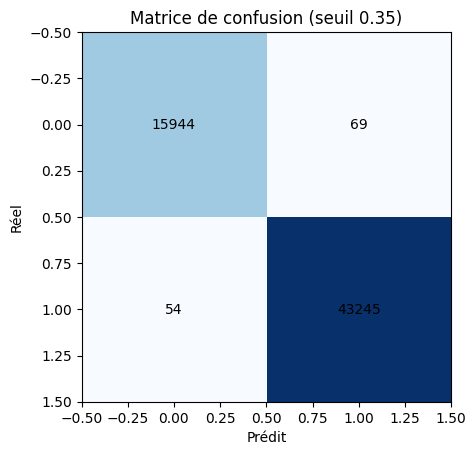

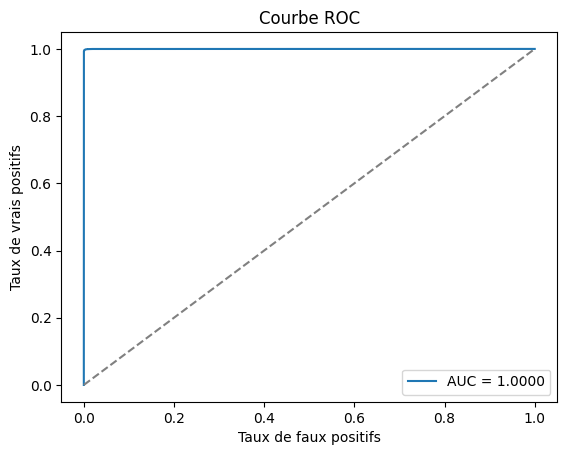

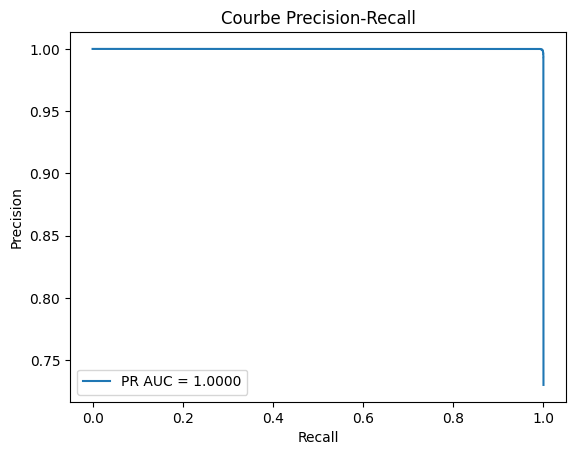

In [32]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# Prédictions binaires au seuil optimal trouvé plus haut
y_pred_bin = (y_val_pred >= best_thr).astype(int)

# --- Matrice de confusion ---
cm = confusion_matrix(y_val, y_pred_bin)
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap="Blues")
ax.set_title("Matrice de confusion (seuil {:.2f})".format(best_thr))
ax.set_xlabel("Prédit")
ax.set_ylabel("Réel")
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="black")
plt.show()

# --- Courbe ROC ---
fpr, tpr, _ = roc_curve(y_val, y_val_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label="AUC = {:.4f}".format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.show()

# --- Courbe Precision-Recall ---
precision, recall, _ = precision_recall_curve(y_val, y_val_pred)
plt.figure()
plt.plot(recall, precision, label="PR AUC = {:.4f}".format(auc(recall, precision)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Courbe Precision-Recall")
plt.legend(loc="lower left")
plt.show()


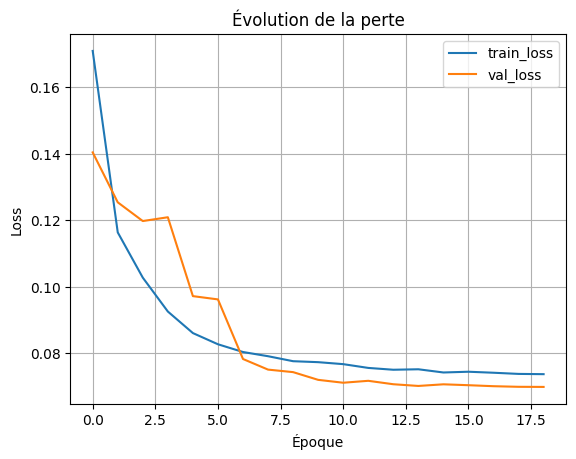

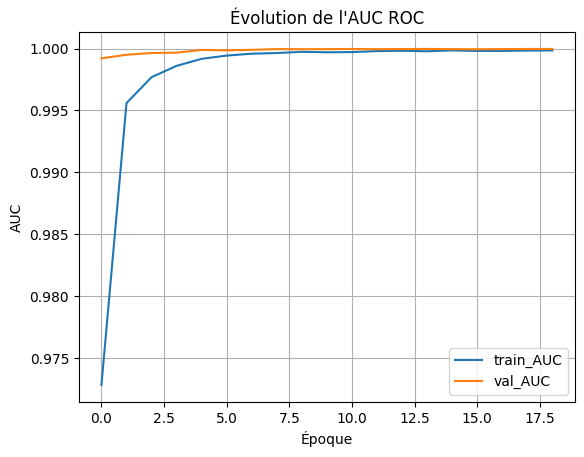

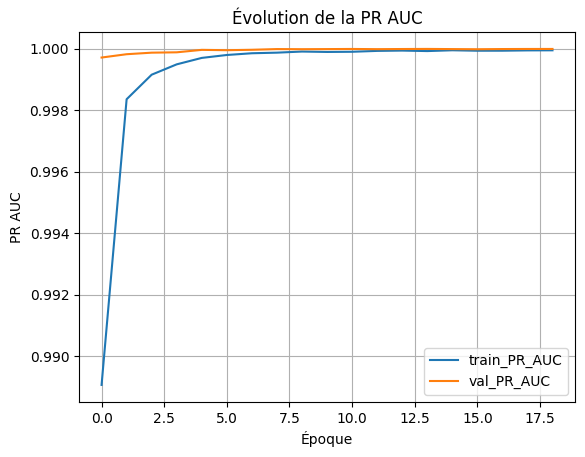

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Accuracy (val, seuil 0.35) = 0.9979
Précision = 0.9984 | Rappel = 0.9988 | F1 = 0.9986


In [34]:
import matplotlib.pyplot as plt

#  Loss (train/val)
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Évolution de la perte")
plt.xlabel("Époque"); plt.ylabel("Loss"); plt.legend(); plt.grid(True); plt.show()

#  AUC ROC (train/val)
plt.figure()
plt.plot(history.history['AUC'], label='train_AUC')
plt.plot(history.history['val_AUC'], label='val_AUC')
plt.title("Évolution de l'AUC ROC")
plt.xlabel("Époque"); plt.ylabel("AUC"); plt.legend(); plt.grid(True); plt.show()

#  PR_AUC (train/val)
plt.figure()
plt.plot(history.history['PR_AUC'], label='train_PR_AUC')
plt.plot(history.history['val_PR_AUC'], label='val_PR_AUC')
plt.title("Évolution de la PR AUC")
plt.xlabel("Époque"); plt.ylabel("PR AUC"); plt.legend(); plt.grid(True); plt.show()

#  Accuracy finale au seuil optimal (pas par époque)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_val_pred = model.predict(X_val, batch_size=4096).ravel()
y_hat = (y_val_pred >= best_thr).astype(int)

acc  = accuracy_score(y_val, y_hat)
prec = precision_score(y_val, y_hat)
rec  = recall_score(y_val, y_hat)
f1   = f1_score(y_val, y_hat)

print(f"Accuracy (val, seuil {best_thr:.2f}) = {acc:.4f}")
print(f"Précision = {prec:.4f} | Rappel = {rec:.4f} | F1 = {f1:.4f}")


Interpretation: Interprétation des courbes d’apprentissage :
Perte (Loss) : la perte d’entraînement et de validation diminue rapidement sur les premières époques avant de se stabiliser autour de 0,07, ce qui indique une bonne convergence du modèle sans signe de sur-apprentissage marqué.
AUC ROC et PR AUC : les scores atteignent quasiment 1,00 dès les premières époques et restent stables, montrant que le modèle sépare parfaitement les classes définies par les pseudo-labels.
L’absence d’écart important entre les courbes d’entraînement et de validation confirme que le modèle généralise bien par rapport aux pseudo-labels utilisés comme vérité de référence.

Le réseau de neurones atteint une précision, un rappel et un F1-score supérieurs à 99,8 %, avec des AUC ROC et PR parfaites, traduisant une reproduction quasi intégrale des pseudo-labels générés par MiniBatchKMeans. Les courbes d’apprentissage confirment une convergence rapide et stable, sans sur-apprentissage apparent. Ces résultats mesurent cependant la fidélité aux pseudo-labels, et non la performance sur des labels réels, ce qui limite leur interprétation clinique directe

## cas où on recherche le meilleur K

#### Réduction de dimension avant clustering

In [35]:
import numpy as np
from sklearn.decomposition import PCA

# Données standardisées déjà prêtes : X_scaled_df
X = X_scaled_df.astype(np.float32, copy=False).values

# PCA rapide (20 comp.) 
pca = PCA(n_components=20, random_state=42)
X_red = pca.fit_transform(X).astype(np.float32)
print(f"Variance expliquée PCA(20) = {pca.explained_variance_ratio_.sum():.2%}")


Variance expliquée PCA(20) = 97.98%


##### Évaluation de plusieurs valeurs de k avec MiniBatchKMeans
(On teste k = 2 à 10 et on calcule 4 indicateurs : Silhouette, Calinski–Harabasz, Davies–Bouldin, Inertie)

In [36]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def eval_k_range(X_red, k_list, sample_size=20000, batch_size=8192, n_init=20, repeats=1):
    """Évalue chaque k avec plusieurs indices. repeats>1 = robustesse (moyenne)."""
    rng = np.random.default_rng(42)
    results = []
    for k in k_list:
        sils, chs, dbs, inerts = [], [], [], []
        for r in range(repeats):
            mbk = MiniBatchKMeans(n_clusters=k, batch_size=batch_size,
                                  n_init=n_init, max_iter=100, random_state=42+r)
            labels = mbk.fit_predict(X_red)
            # Silhouette sur échantillon pour la vitesse
            sil = silhouette_score(X_red, labels, sample_size=sample_size, random_state=42, metric="euclidean")
            ch  = calinski_harabasz_score(X_red, labels)
            db  = davies_bouldin_score(X_red, labels)
            inert = mbk.inertia_  # somme des distances au centre (pour "elbow")
            sils.append(sil); chs.append(ch); dbs.append(db); inerts.append(inert)
        results.append({
            "k": k,
            "silhouette": float(np.mean(sils)),
            "calinski_harabasz": float(np.mean(chs)),
            "davies_bouldin": float(np.mean(dbs)),
            "inertia": float(np.mean(inerts)),
        })
    import pandas as pd
    return pd.DataFrame(results)

k_list = list(range(2, 11))  # 2 à 10 
dfk = eval_k_range(X_red, k_list, sample_size=20000, repeats=2)  # repeats=2 pour robustesse légère
dfk


,k,silhouette,calinski_harabasz,davies_bouldin,inertia
0,2,0.183429,37713.429688,2.506406,5414939.250
1,3,0.067440,28209.734375,2.992608,5131496.250
2,4,0.051940,22296.058594,3.159574,4983231.250
3,5,0.055547,20178.425781,2.830868,4801219.750
4,6,0.070985,20421.720703,2.625967,4544862.750
5,7,0.073592,19361.691406,2.565762,4387631.000
6,8,0.066739,18162.095703,2.576017,4280787.875
7,9,0.063798,17129.300781,2.546909,4183418.125
8,10,0.068478,17708.201172,2.359397,3980371.625


Interpretation: La valeur optimale de k a été déterminée en testant k=2 à 10 avec MiniBatchKMeans sur les données réduites par PCA (20 composantes), et en comparant les indices de Silhouette, Calinski–Harabasz, Davies–Bouldin et l’inertie. Les résultats montrent que k=2 maximise simultanément le Silhouette et le Calinski–Harabasz tout en minimisant le Davies–Bouldin, justifiant son choix pour la génération des pseudo-labels.

##### Visualisation des résultats pour chaque k

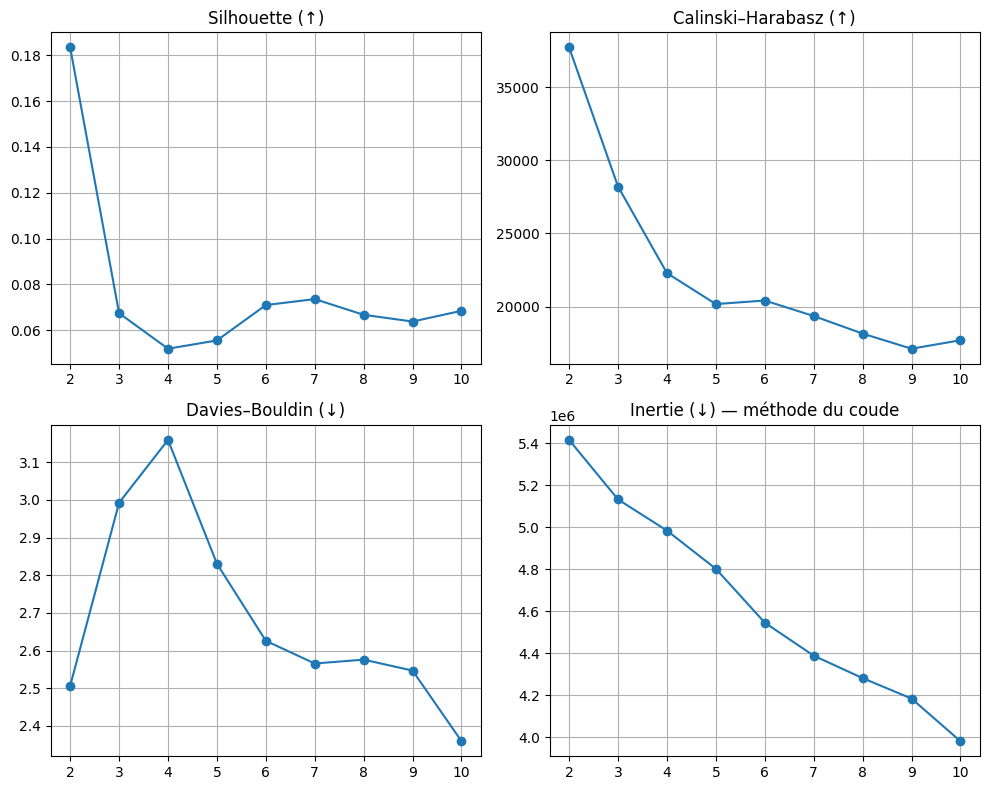

In [37]:

fig, axes = plt.subplots(2, 2, figsize=(10,8))
ax = axes.ravel()

# Silhouette 
ax[0].plot(dfk["k"], dfk["silhouette"], marker="o"); ax[0].set_title("Silhouette (↑)"); ax[0].grid(True)

# Calinski–Harabasz 
ax[1].plot(dfk["k"], dfk["calinski_harabasz"], marker="o"); ax[1].set_title("Calinski–Harabasz (↑)"); ax[1].grid(True)

# Davies–Bouldin 
ax[2].plot(dfk["k"], dfk["davies_bouldin"], marker="o"); ax[2].set_title("Davies–Bouldin (↓)"); ax[2].grid(True)

# Inertie  + coude
ax[3].plot(dfk["k"], dfk["inertia"], marker="o"); ax[3].set_title("Inertie (↓) — méthode du coude"); ax[3].grid(True)

plt.tight_layout(); plt.show()


Conclusion : on retient k = 2 pour la pseudo-labellisation.

# conclusion generale du projet

L’évaluation des deux scénarios de classification avec réseau de neurones montre que les deux configurations atteignent des performances remarquablement élevées. Avec une séparation binaire (k = 2), le modèle obtient une accuracy de 0,9979 et un F1-score global de 0,9986, avec seulement 69 faux positifs et 54 faux négatifs sur l’ensemble de validation. Cette excellente performance s’explique par la simplicité de la frontière de décision dans un problème binaire, qui réduit les confusions.

La séparation en trois classes (k = 3) conserve un haut niveau de performance (accuracy = 0,9937, Macro-F1 = 0,9926) et permet de distinguer une classe intermédiaire (“pré-diabète”), ce qui peut avoir un intérêt médical pour la prévention. Cependant, cette granularité supplémentaire rend la tâche légèrement plus complexe, entraînant une baisse marginale des métriques par rapport au scénario binaire.

la recherche du k optimal a donne la valeur de 2 ce qui rejoint l'idee du laboratoire 2

En résumé :
Pour maximiser la performance pure, la séparation k = 2 est la plus efficace.
Pour répondre à un besoin métier de suivi et prévention, la séparation k = 3 est pertinente, car elle fournit une information clinique supplémentaire sur l’état intermédiaire.